<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Typical Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool 

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 

Target: 
======

In this step

1. I have choosen vanilla architecture of 6 convolution layer and 2 transtion blocks (maxpool) 
2. Used GAP in the the last layer. 
3. My target is to achieve 99% validation accuracy
4. Once I get 99% accuracy , I know I can refine the mode further to achieve higher accuracy with less parameters
5. Run it for 20 epochs to study how the accuracy changes in vanila architecture

Result: 
======
1. Observed Train accuracy: 99.58%
2. Validation accuracy:99.23%
3. Number of parameters: 40,202


Analysis: 
========

1. I could see that validation accuracy is steadily increasing over epochs, and finally got validation accuracy of 99.23%. This tells me that it is a good architecture to explore further. 

2. I also noticed that train accuracy is 99.58% which is much higher than validation accuracy of 99.23%,. This means that the model is possibly overfitting. But as number of parameters is 40,202 which is around 4 times my target parameters, I will try to reduce the parameters in next step and observe the impact before trying out other options to increase the validation accuracy


In [2]:
from model import model1 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
            Conv2d-3           [-1, 32, 28, 28]           9,248
              ReLU-4           [-1, 32, 28, 28]               0
         MaxPool2d-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              ReLU-7           [-1, 32, 14, 14]               0
            Conv2d-8           [-1, 32, 14, 14]           9,248
              ReLU-9           [-1, 32, 14, 14]               0
        MaxPool2d-10             [-1, 32, 7, 7]               0
           Conv2d-11             [-1, 32, 5, 5]           9,248
             ReLU-12             [-1, 32, 5, 5]               0
           Conv2d-13             [-1, 10, 3, 3]           2,890
AdaptiveAvgPool2d-14             [-1, 1

G:\TSAI-ERA\Session 7\model.py:59: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize - Yes that's the only thing i am going to apply on the data for now


In [6]:
#torch.manual_seed(1)
from dataset import get_train_loader, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader(batch_size, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [7]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [8]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 20):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    #scheduler.step()

Currently Executing Epoch: 1


Loss=0.18512775003910065 Batch_id=468 Accuracy=69.24: 100%|██████████████████████████| 469/469 [01:50<00:00,  4.25it/s]



Test set: Average loss: 0.1030, Accuracy: 9675/10000 (96.75%)

Currently Executing Epoch: 2


Loss=0.04868738725781441 Batch_id=468 Accuracy=96.82: 100%|██████████████████████████| 469/469 [01:48<00:00,  4.33it/s]



Test set: Average loss: 0.0600, Accuracy: 9811/10000 (98.11%)

Currently Executing Epoch: 3


Loss=0.045241281390190125 Batch_id=468 Accuracy=97.81: 100%|█████████████████████████| 469/469 [01:49<00:00,  4.26it/s]



Test set: Average loss: 0.0540, Accuracy: 9819/10000 (98.19%)

Currently Executing Epoch: 4


Loss=0.006661669816821814 Batch_id=468 Accuracy=98.35: 100%|█████████████████████████| 469/469 [01:47<00:00,  4.35it/s]



Test set: Average loss: 0.0403, Accuracy: 9866/10000 (98.66%)

Currently Executing Epoch: 5


Loss=0.03489043563604355 Batch_id=468 Accuracy=98.68: 100%|██████████████████████████| 469/469 [01:49<00:00,  4.29it/s]



Test set: Average loss: 0.0374, Accuracy: 9878/10000 (98.78%)

Currently Executing Epoch: 6


Loss=0.051911305636167526 Batch_id=468 Accuracy=98.77: 100%|█████████████████████████| 469/469 [01:50<00:00,  4.25it/s]



Test set: Average loss: 0.0425, Accuracy: 9866/10000 (98.66%)

Currently Executing Epoch: 7


Loss=0.006032245699316263 Batch_id=468 Accuracy=98.98: 100%|█████████████████████████| 469/469 [01:49<00:00,  4.30it/s]



Test set: Average loss: 0.0280, Accuracy: 9915/10000 (99.15%)

Currently Executing Epoch: 8


Loss=0.026831330731511116 Batch_id=468 Accuracy=99.06: 100%|█████████████████████████| 469/469 [01:46<00:00,  4.40it/s]



Test set: Average loss: 0.0317, Accuracy: 9898/10000 (98.98%)

Currently Executing Epoch: 9


Loss=0.000857899896800518 Batch_id=468 Accuracy=99.15: 100%|█████████████████████████| 469/469 [01:47<00:00,  4.35it/s]



Test set: Average loss: 0.0395, Accuracy: 9869/10000 (98.69%)

Currently Executing Epoch: 10


Loss=0.08049225062131882 Batch_id=468 Accuracy=99.23: 100%|██████████████████████████| 469/469 [01:48<00:00,  4.33it/s]



Test set: Average loss: 0.0249, Accuracy: 9922/10000 (99.22%)

Currently Executing Epoch: 11


Loss=0.0051569570787250996 Batch_id=468 Accuracy=99.30: 100%|████████████████████████| 469/469 [01:45<00:00,  4.46it/s]



Test set: Average loss: 0.0232, Accuracy: 9918/10000 (99.18%)

Currently Executing Epoch: 12


Loss=0.01719820871949196 Batch_id=468 Accuracy=99.41: 100%|██████████████████████████| 469/469 [01:44<00:00,  4.49it/s]



Test set: Average loss: 0.0286, Accuracy: 9917/10000 (99.17%)

Currently Executing Epoch: 13


Loss=0.002032860182225704 Batch_id=468 Accuracy=99.41: 100%|█████████████████████████| 469/469 [01:46<00:00,  4.40it/s]



Test set: Average loss: 0.0360, Accuracy: 9875/10000 (98.75%)

Currently Executing Epoch: 14


Loss=0.011909219436347485 Batch_id=468 Accuracy=99.44: 100%|███████████████████████| 469/469 [1:26:22<00:00, 11.05s/it]



Test set: Average loss: 0.0253, Accuracy: 9923/10000 (99.23%)

Currently Executing Epoch: 15


Loss=0.051704514771699905 Batch_id=468 Accuracy=99.45: 100%|█████████████████████████| 469/469 [01:48<00:00,  4.34it/s]



Test set: Average loss: 0.0270, Accuracy: 9920/10000 (99.20%)

Currently Executing Epoch: 16


Loss=0.002400600118562579 Batch_id=468 Accuracy=99.52: 100%|█████████████████████████| 469/469 [01:49<00:00,  4.30it/s]



Test set: Average loss: 0.0251, Accuracy: 9922/10000 (99.22%)

Currently Executing Epoch: 17


Loss=0.008036096580326557 Batch_id=468 Accuracy=99.54: 100%|█████████████████████████| 469/469 [01:52<00:00,  4.17it/s]



Test set: Average loss: 0.0320, Accuracy: 9907/10000 (99.07%)

Currently Executing Epoch: 18


Loss=0.01564224623143673 Batch_id=468 Accuracy=99.58: 100%|██████████████████████████| 469/469 [01:54<00:00,  4.09it/s]



Test set: Average loss: 0.0307, Accuracy: 9912/10000 (99.12%)

Currently Executing Epoch: 19


Loss=0.0008778916671872139 Batch_id=468 Accuracy=99.55: 100%|████████████████████████| 469/469 [02:21<00:00,  3.32it/s]



Test set: Average loss: 0.0271, Accuracy: 9917/10000 (99.17%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [9]:
from utils import plot_loss

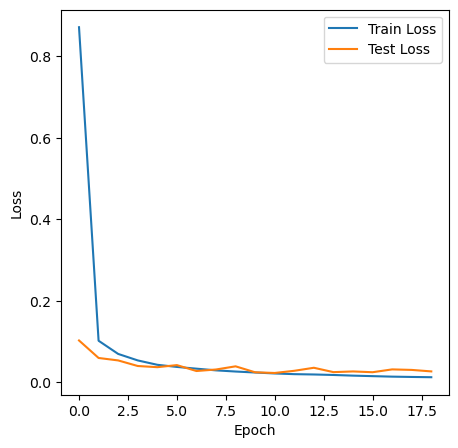

In [10]:
plot_loss(train_losses, test_losses)

In [11]:
from utils import plot_accuracy

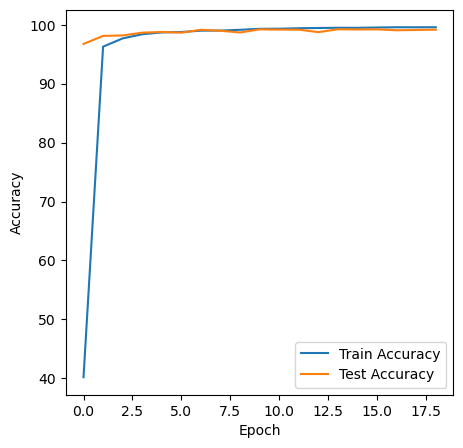

In [12]:
plot_accuracy(train_acc, test_acc)

Summary
=========
